<a href="https://colab.research.google.com/github/ThiagoPedrazi/MVPPuc_Sprint2/blob/MVP_PUC_ThiagoPedrazi/MVP_Sprint2A_ThiagoPedrazi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários

# Modelagem de dados
import pandas as pd
import numpy as np

# Graficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Modelos
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# configurações
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

plt.rcParams['figure.figsize'] = ( 12, 6 )
plt.style.use('seaborn-darkgrid')

# Libs
import re # REGEX
import nltk # NLP

# Carga do Dataset - Projeto A: Machine Learning

In [3]:
# Projeto A - Machine Learning

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/ThiagoPedrazi/MVPPuc_Sprint2/MVP_PUC_ThiagoPedrazi/Parkinsonsdisease.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=';')

# Mostra as primeiras 10 linhas do dataset
dataset.head(10)

,diseasehistory,Glucose,BloodPressure,SkinThickness,Insulin,height,Weight,Age,Parkinsonsdisease
0,9,101,44,6,253,169,74,54,1
1,5,129,55,45,331,176,118,73,1
2,0,126,66,14,228,152,145,29,1
3,4,128,31,28,320,166,113,29,0
4,0,116,99,50,123,182,54,53,1
5,6,88,82,1,871,163,104,36,0
6,10,125,3,26,371,181,59,73,0
7,1,134,4,24,544,160,74,44,0
8,9,179,12,31,816,175,61,41,0
9,9,172,3,47,819,163,148,68,1


# Separação em conjunto de treino e conjunto de teste com holdout

In [ ]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,0:8]
y = array[:,8]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

# Modelagem e Inferência

# Criação e avaliação de modelos: linha base

LR: 0.493129 (0.024140)
KNN: 0.494354 (0.018436)
CART: 0.505893 (0.016990)
NB: 0.505162 (0.016820)
SVM: 0.514980 (0.001073)
Bagging: 0.500744 (0.019478)
RF: 0.486026 (0.030263)
ET: 0.498037 (0.026615)
Ada: 0.489932 (0.027458)
GB: 0.482076 (0.025445)
Voting: 0.505647 (0.011207)


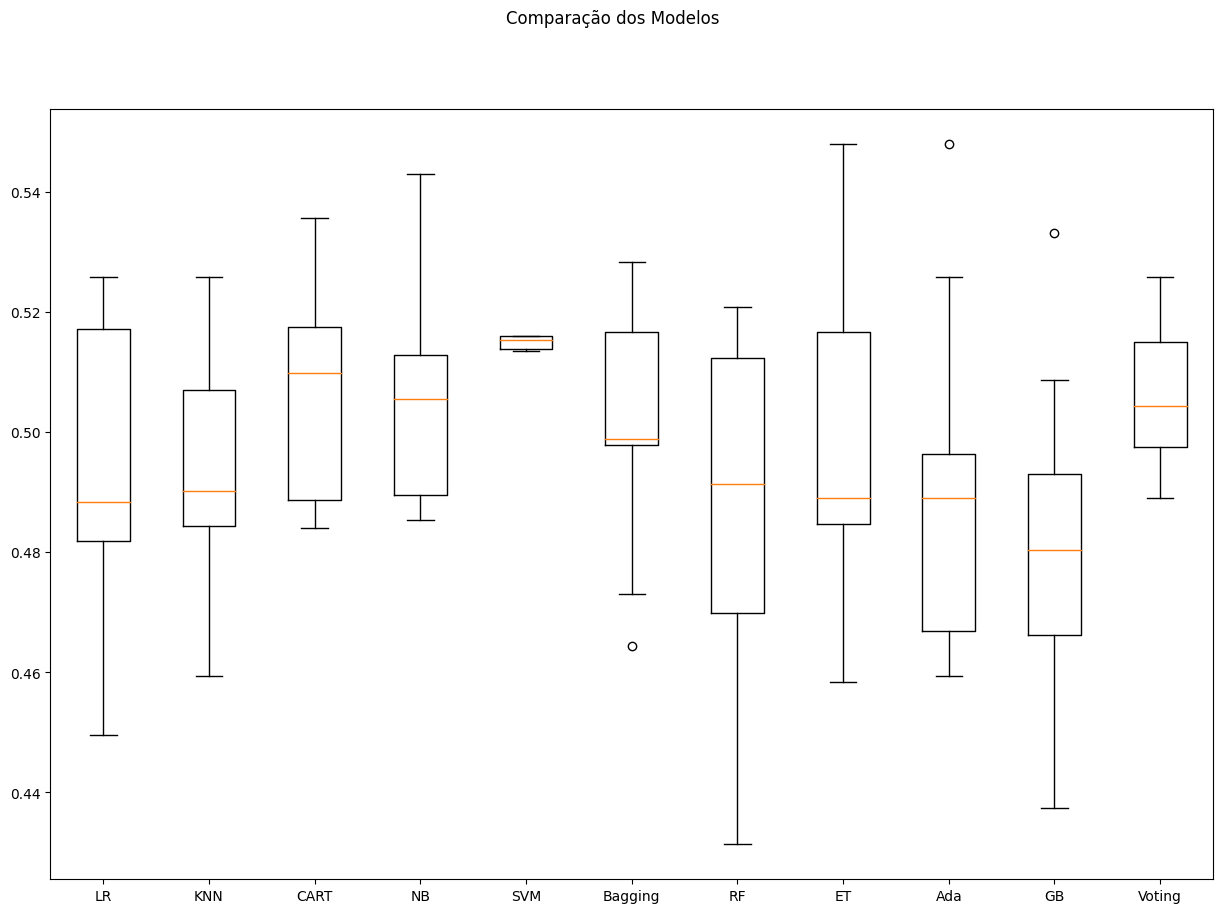

In [ ]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Criação e avaliação de modelos: dados padronizados e normalizados

LR-orig: 0.493 (0.024)
KNN-orig: 0.494 (0.018)
CART-orig: 0.506 (0.017)
NB-orig: 0.505 (0.017)
SVM-orig: 0.515 (0.001)
Bag-orig: 0.501 (0.019)
RF-orig: 0.486 (0.030)
ET-orig: 0.498 (0.027)
Ada-orig: 0.490 (0.027)
GB-orig: 0.482 (0.025)
Vot-orig: 0.506 (0.011)
LR-padr: 0.507 (0.020)
KNN-padr: 0.502 (0.031)
CART-padr: 0.509 (0.017)
NB-padr: 0.505 (0.017)
SVM-padr: 0.487 (0.026)
Bag-padr: 0.487 (0.030)
RF-padr: 0.492 (0.027)
ET-padr: 0.497 (0.018)
Ada-padr: 0.490 (0.027)
GB-padr: 0.482 (0.026)
Vot-padr: 0.503 (0.024)
LR-norm: 0.507 (0.020)
KNN-norm: 0.506 (0.031)
CART-norm: 0.505 (0.020)
NB-norm: 0.505 (0.017)
SVM-norm: 0.487 (0.023)
Bag-norm: 0.484 (0.019)
RF-norm: 0.499 (0.024)
ET-norm: 0.502 (0.032)
Ada-norm: 0.490 (0.027)
GB-norm: 0.484 (0.025)
Vot-norm: 0.503 (0.024)


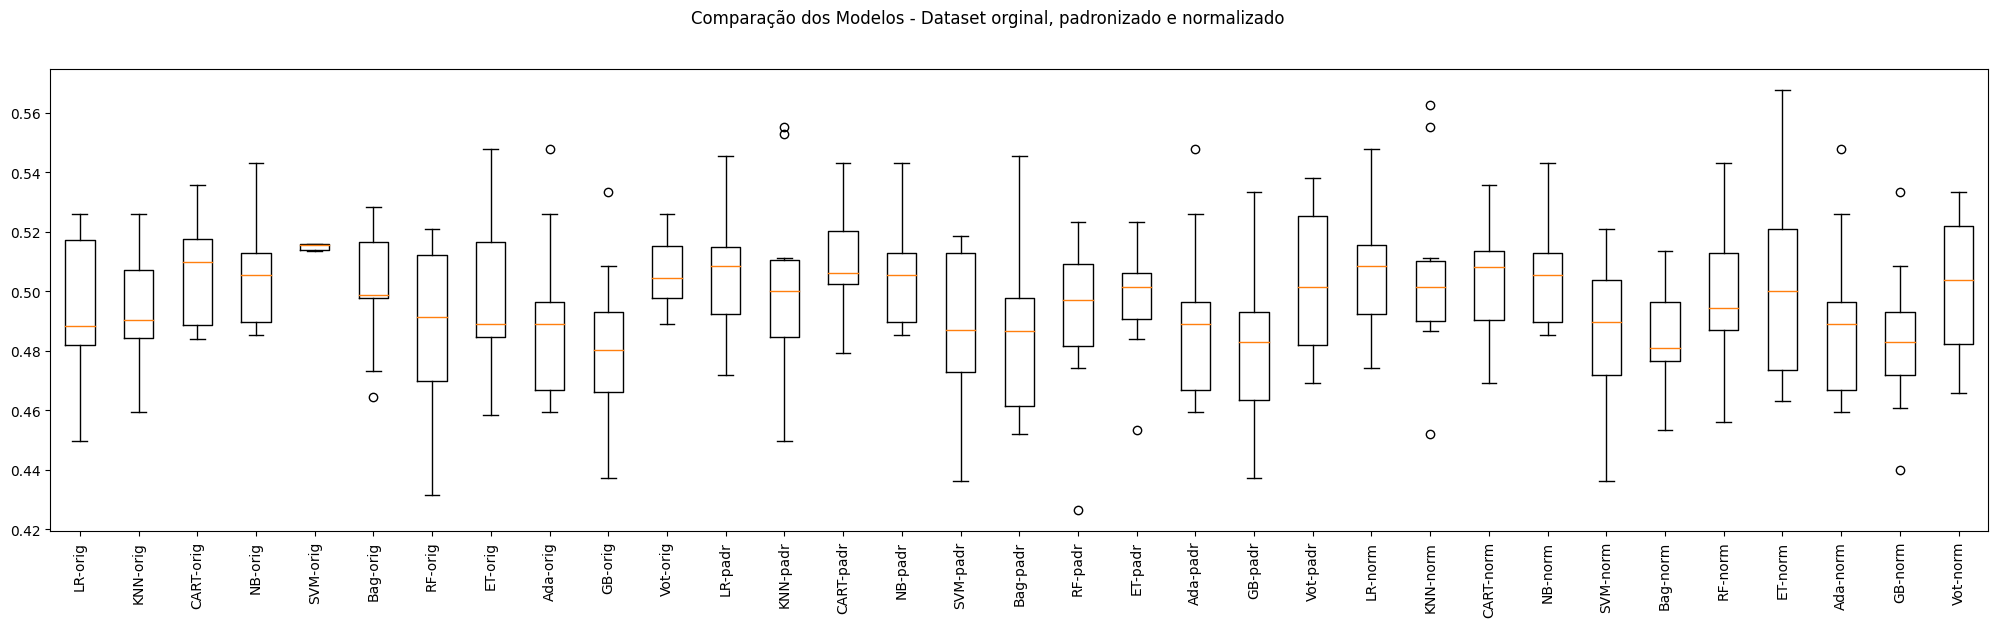

In [ ]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

# Otimização dos hiperparâmetros

In [ ]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.511051 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}
Sem tratamento de missings: knn-padr - Melhor: 0.505162 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}
Sem tratamento de missings: knn-norm - Melhor: 0.505897 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 5}


# Finalização do Modelo

In [ ]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = LogisticRegression(max_iter=200)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.48821218074656186


# Simulando a aplicação do modelo em dados não vistos

In [ ]:
# Novos dados - não sabemos a classe!
data = {'diseasehistory':  [1, 9, 5],
        'Glucose': [90, 100, 110],
        'BloodPressure': [50, 60, 50],
        'SkinThickness': [30, 30, 30],
        'Insulin': [100, 233, 544],
        'height': [160, 175, 185],
        'Weight': [65, 81, 90],
        'age': [30, 45, 48],
        }

atributos = ['diseasehistory', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'height', 'Weight', 'age']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:8].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[-1.28954542 -1.10045638  0.00227955  0.35486569 -1.35455155 -0.85166222
  -1.21463541 -1.05713896]
 [ 1.23726551 -0.79225109  0.34606896  0.35486569 -0.83895189  0.4144202
  -0.6613534  -0.22136729]
 [-0.02613996 -0.4840458   0.00227955  0.35486569  0.36669842  1.25847515
  -0.35013227 -0.05421296]]


In [ ]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[1 1 1]


# Projeto B - Deep Learning

# Carga do Dataset - Projeto B: Deep Learning

In [6]:
# Projeto B - Deep learning

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/ThiagoPedrazi/MVPPuc_Sprint2/MVP_PUC_ThiagoPedrazi/Tweets_Mg.csv"

# Lê o arquivo
Base_Dados = pd.read_csv(url, delimiter=',')

# Mostra as primeiras 10 linhas do dataset
dataset.head(10)

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,Observação,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,Sat Jan 07 13:47:55 +0000 2017,""" bom é bandido morto""\nDeputado Cabo Júlio é ...",NaN,NaN,Um Outro Mundo É Possível,Maristela Guimarães,florpimenta,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,Wed Jan 04 23:00:53 +0000 2017,"""..E 25% dos mineiros dizem não torcer para ti...",NaN,NaN,NaN,Adriano,almanakfc,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,Sun Jan 08 18:34:22 +0000 2017,"""A gigantesca barba do mal"" em destaque no cad...",NaN,NaN,"Belo Horizonte, Brasil",Editora Nemo,editoranemo,2,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,Wed Jan 04 22:55:08 +0000 2017,"""BB e governo de Minas travam disputa sobre de...",NaN,NaN,NaN,Minas Previ,MinasPrevi,0,Negativo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,Sat Jan 07 01:37:10 +0000 2017,"""com vcs bh fica pequena!"" Belo Horizonte (pro...",NaN,NaN,Belo Horizonte - MG,Marina.,mmarinaey,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Dimensão
Base_Dados.shape

(8199, 26)

# **Modelagem & EDA (Exploração)**

## **Campos Nulos**

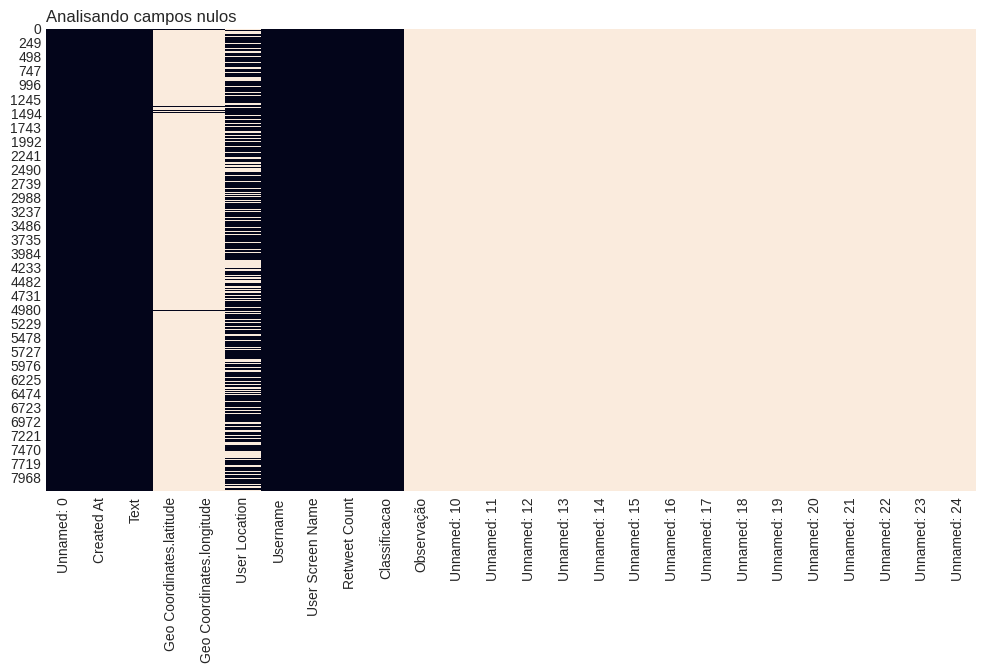

In [8]:
# campos nulos
Nulos = Base_Dados.isnull()

plt.title('Analisando campos nulos', loc='left')
sns.heatmap( Nulos, cbar=False );

In [9]:
# Colunas
Base_Dados.columns

Index(['Unnamed: 0', 'Created At', 'Text', 'Geo Coordinates.latitude',
       'Geo Coordinates.longitude', 'User Location', 'Username',
       'User Screen Name', 'Retweet Count', 'Classificacao', 'Observação',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')

In [10]:
# Remover as colunas
Colunas_Extrair = Base_Dados.columns[10:]
Base_Dados.drop( columns=Colunas_Extrair, inplace=True )

In [11]:
# Dimensão
Base_Dados.shape

(8199, 10)

In [12]:
# Unicos
Base_Dados.nunique()

Unnamed: 0                   8199
Created At                   7945
Text                         5765
Geo Coordinates.latitude       57
Geo Coordinates.longitude      57
User Location                1591
Username                     3907
User Screen Name             3966
Retweet Count                 113
Classificacao                   3
dtype: int64

In [13]:
# Retirar
Base_Dados.drop( columns='Unnamed: 0', inplace=True )

# Dimensão
Base_Dados.shape

(8199, 9)

In [14]:
# Verificando
Base_Dados.head()

,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao
0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro
1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro
2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro
3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro
4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo


In [15]:
# Info
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8199 entries, 0 to 8198
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Created At                 8199 non-null   object 
 1   Text                       8199 non-null   object 
 2   Geo Coordinates.latitude   104 non-null    float64
 3   Geo Coordinates.longitude  104 non-null    float64
 4   User Location              5489 non-null   object 
 5   Username                   8199 non-null   object 
 6   User Screen Name           8199 non-null   object 
 7   Retweet Count              8199 non-null   int64  
 8   Classificacao              8199 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 576.6+ KB


## **Ajustando Data**

In [16]:
# Função
from dateutil.parser import parse

Experimento_Data = Base_Dados['Created At'][0]

print( f'Antes: {Experimento_Data}' )
print( f'Depois: { parse( Experimento_Data ).date() }' )

Antes: Sun Jan 08 01:22:05 +0000 2017
Depois: 2017-01-08


In [17]:
# Função para extrair

def Ajustar_Data( Data ):
  '''
    Função para converter Data
  '''
  # Atribuir
  Texto_Data = Data
  # Transform
  Transformacao = parse( Texto_Data )
  # Extracação
  Data_Formatada = Transformacao.date()
  return Data_Formatada

# Atribuindo função
Base_Dados['Data_Formatada'] = Base_Dados['Created At'].apply( Ajustar_Data )

# Filtro
Base_Dados.iloc[0:5, 5:]

,Username,User Screen Name,Retweet Count,Classificacao,Data_Formatada
0,Leonardo C Schneider,LeoCSchneider,0,Neutro,2017-01-08
1,Wândell,klefnews,0,Neutro,2017-01-08
2,Wândell,klefnews,0,Neutro,2017-01-08
3,Ana estudando,estudandoconcur,0,Neutro,2017-01-04
4,Emily,Milly777,0,Negativo,2017-01-09


In [18]:
# Exemplo de outra forma
Base_Dados['Created At'].apply( lambda Texto : parse(Texto).date() )

0       2017-01-08
1       2017-01-08
2       2017-01-08
3       2017-01-04
4       2017-01-09
           ...    
8194    2017-02-09
8195    2017-02-09
8196    2017-02-09
8197    2017-02-09
8198    2017-02-07
Name: Created At, Length: 8199, dtype: object

In [20]:
# Gerando Meses, Ano, Dias

# transforma data
Base_Dados['Data_Formatada'] = pd.to_datetime( Base_Dados['Data_Formatada'] )

# Extraindo
Base_Dados['Ano'] = Base_Dados['Data_Formatada'].dt.year
Base_Dados['Mes'] = Base_Dados['Data_Formatada'].dt.month
Base_Dados['Dia'] = Base_Dados['Data_Formatada'].dt.day

Base_Dados.iloc[0:5, 5:]

,Username,User Screen Name,Retweet Count,Classificacao,Data_Formatada,Ano,Mes,Dia
0,Leonardo C Schneider,LeoCSchneider,0,Neutro,2017-01-08,2017,1,8
1,Wândell,klefnews,0,Neutro,2017-01-08,2017,1,8
2,Wândell,klefnews,0,Neutro,2017-01-08,2017,1,8
3,Ana estudando,estudandoconcur,0,Neutro,2017-01-04,2017,1,4
4,Emily,Milly777,0,Negativo,2017-01-09,2017,1,9


In [21]:
# Analisando
Base_Dados.groupby( by=['Ano', 'Mes'] ).agg(
    Quantidade = ('Username', 'count')
)

Quantidade
Ano  Mes            
2016 12            3
2017 1          7073
     2          1123

## **Ajustando Geo-Localização**

In [22]:
Base_Dados.isnull().sum()

Created At                      0
Text                            0
Geo Coordinates.latitude     8095
Geo Coordinates.longitude    8095
User Location                2710
Username                        0
User Screen Name                0
Retweet Count                   0
Classificacao                   0
Data_Formatada                  0
Ano                             0
Mes                             0
Dia                             0
dtype: int64

In [23]:
# Filtrando os nulos
Analise_Geo = Base_Dados.loc[
    ( Base_Dados['Geo Coordinates.latitude'].notnull() ) &
    ( Base_Dados['Geo Coordinates.longitude'].notnull() )
]

# Shape
Analise_Geo.shape

(104, 13)

In [24]:
# Verificar
Analise_Geo.head()

,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,Data_Formatada,Ano,Mes,Dia
1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.933300,-18.850000,NaN,Wândell,klefnews,0,Neutro,2017-01-08,2017,1,8
2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.933300,-18.850000,NaN,Wândell,klefnews,0,Neutro,2017-01-08,2017,1,8
105,Fri Jan 06 13:31:11 +0000 2017,#road #trip #mg #car #gopro @ Governador Valad...,-41.933300,-18.850000,Brasil,Heliel Braga,helielbraga,0,Neutro,2017-01-06,2017,1,6
302,Fri Jan 06 00:10:47 +0000 2017,"��❤️ @ Governador Valadares, Minas Gerais http...",-41.933300,-18.850000,Snap: duraoluiza,Luiza�,LuizaFarias9,0,Neutro,2017-01-06,2017,1,6
607,Tue Jan 10 10:47:26 +0000 2017,"bom dia! (@ LFG in Governador Valadares, Minas...",-41.940796,-18.860655,"Minas, Brasil",snap: brunolasco ♎,brunolasco,0,Neutro,2017-01-10,2017,1,10


In [25]:
# Agrupar as Geo
Analise_Localizacao = Analise_Geo.groupby( by=['Geo Coordinates.latitude', 'Geo Coordinates.longitude'] ).count()[['Username']].reset_index()

# Renomeando colunas
Analise_Localizacao.columns = ['Lat', 'Lon', 'Quantidade']

# Verificando
Analise_Localizacao.head()

,Lat,Lon,Quantidade
0,-46.643035,-22.270759,2
1,-46.627106,-23.493237,2
2,-46.616726,-21.131515,1
3,-45.523750,-22.330291,1
4,-45.236850,-19.331757,1


In [26]:
# Plot dos dados
px.density_mapbox(
    # Dados
    Analise_Localizacao,
    # LAtitude
    lat='Lat',
    # Longitude
    lon='Lon',
    # Quantidade
    z='Quantidade',
    # Estilo do mapa
    mapbox_style='stamen-terrain',
    # Centralização
    center=dict(lat=-23.700, lon=-46.555),
    # Zoom do mapa
    zoom=3,
    # Ciruclo
    radius=30
)

In [27]:
# Verificando
Base_Dados['User Location'].head(20)

0                             Brasil
1                                NaN
2                                NaN
3                                NaN
4                                NaN
5         Um Outro Mundo É Possível 
6                                NaN
7             Belo Horizonte, Brasil
8                                NaN
9                Belo Horizonte - MG
10      error 404 location not found
11              Minas Gerais, Brasil
12    Santo Antônio do Monte, Brasil
13                            BRASIL
14                               NaN
15            San Pedro Garza García
16                               NaN
17            Belo Horizonte, Brasil
18          Belo Horizonte MG Brasil
19          Belo Horizonte/MG/Brasil
Name: User Location, dtype: object

In [55]:
# Instalando o GEO PY
!pip install geopy

In [61]:
# Função
from geopy.geocoders import Nominatim

# Instanciando a função
Instanciando_Funcao = Nominatim( user_agent='GetLoc' )